In [1]:
import matplotlib as mpl

mpl.rc('image', interpolation='none')
mpl.rc('savefig', dpi=300, transparent=False, bbox='tight')
mpl.rc('path', simplify=True)
mpl.rc('axes', linewidth=0.3)
mpl.rc('font', size=6)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

In [3]:
def crop_image(image):
    return image[200:1000, 500:1500]

In [4]:
rgb_dir = Path('/root/data/examples/RGB')
images = [crop_image(plt.imread(str(file))) for file in rgb_dir.iterdir()]

In [50]:
def label_image(ax, idx):
    x, y = (0.05, 0.95)
    text = str(idx + 1)
    
    kwargs = {
        "transform": ax.transAxes,
        "horizontalalignment": "left",
        "verticalalignment": "top",
        "weight": "bold",
        "color": "white",
#         "size": "large",
    }
    
    ax.text(x, y, text, **kwargs)

    return ax

In [5]:
def hide_axes(ax):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    return ax

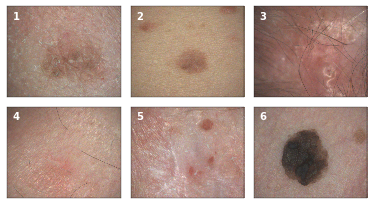

In [51]:
# fig = plt.figure(figsize=(10, 5.33))
fig = plt.figure(figsize=(5, 2.66))
axes = fig.subplots(ncols=3, nrows=2)

for i, image in enumerate(images):
    ax = axes.flat[i]
    ax.imshow(image, rasterized=True)
    label_image(ax, i)
    hide_axes(ax)

# fig.subplots_adjust(wspace=0, hspace=0)
fig.tight_layout(h_pad=1, w_pad=1, pad=0)

fig.savefig('output/Figure_1.eps')
fig.show()

In [18]:
derm_img = plt.imread('/root/data/examples/Dermoscope/7356.png')
print(derm_img.shape)
print(derm_img.shape[0] / derm_img.shape[1])

(1200, 1600, 4)
0.75


In [19]:
hsi_img = plt.imread('/root/data/examples/Clinical/RGB_Image.png')
print(hsi_img.shape)
print(hsi_img.shape[0] / hsi_img.shape[1])

hsi_img = hsi_img[150:900, 500:1500, :]
print(hsi_img.shape)
print(hsi_img.shape[0] / hsi_img.shape[1])

(1200, 1920, 3)
0.625
(750, 1000, 3)
0.75


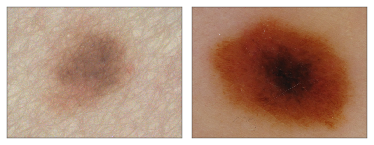

In [20]:
# fig = plt.figure(figsize=(10, 4))
fig = plt.figure(figsize=(5, 2))
ax1, ax2 = fig.subplots(ncols=2)

hide_axes(ax1).imshow(hsi_img[165:-165, 220:-220], rasterized=True)
hide_axes(ax2).imshow(derm_img[300:-300, 400:-400], rasterized=True)

fig.tight_layout(h_pad=1, w_pad=1, pad=0)
fig.savefig('output/Figure_2.eps')
fig.show()